<a href="https://colab.research.google.com/github/riseofsanjay/python/blob/main/examples/image_classification/python/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

# Image Classifier with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to classify images.

## Preparation

Let's start with installing MediaPipe.

In [9]:
!pip install -q mediapipe

Then download an off-the-shelf model. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/image_classifier#models) for more image classification models that you can use.

In [10]:
!wget -O classifier.tflite -q https://storage.googleapis.com/mediapipe-models/image_classifier/efficientnet_lite0/float32/1/efficientnet_lite0.tflite

## Visualization utilities



In [11]:
#@markdown We implemented some functions to visualize the image classification results. <br/> Run the following cell to activate the functions.
from matplotlib import pyplot as plt
plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.labelbottom': False,
    'xtick.bottom': False,
    'ytick.labelleft': False,
    'ytick.left': False,
    'xtick.labeltop': False,
    'xtick.top': False,
    'ytick.labelright': False,
    'ytick.right': False
})


def display_one_image(image, title, subplot, titlesize=16):
    """Displays one image along with the predicted category name and score."""
    plt.subplot(*subplot)
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize), color='black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)

def display_batch_of_images(images, predictions):
    """Displays a batch of images with the classifications."""
    # Images and predictions.
    images = [image.numpy_view() for image in images]

    # Auto-squaring: this will drop data that does not fit into square or square-ish rectangle.
    rows = int(math.sqrt(len(images)))
    cols = len(images) // rows

    # Size and spacing.
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols, 1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))

    # Display.
    for i, (image, prediction) in enumerate(zip(images[:rows*cols], predictions[:rows*cols])):
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols) * 40 + 3
        subplot = display_one_image(image, prediction, subplot, titlesize=dynamic_titlesize)

    # Layout.
    plt.tight_layout()
    plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

## Download test images

Let's grab some test images that we'll use later. The images ([1](https://pixabay.com/photos/hamburger-burger-barbeque-bbq-beef-1238246/), [2](https://pixabay.com/photos/cat-kitten-pets-animals-housecat-2934720/)) are from Pixabay.

In [16]:
import urllib

IMAGE_FILENAMES = ['burger.jpg', 'cat.jpg']

for name in IMAGE_FILENAMES:
  url = f'https://storage.googleapis.com/mediapipe-tasks/image_classifier/{name}'
  urllib.request.urlretrieve(url, name)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [18]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded:
   content = uploaded[filename]
   with open(filename, 'wb') as f:
     f.write(content)
IMAGE_FILENAMES = list(uploaded.keys())

print('Uploaded files:', IMAGE_FILENAMES)

Saving elephant.jpg to elephant.jpg
Uploaded files: ['elephant.jpg']


Then let's check out the images.

burger.jpg


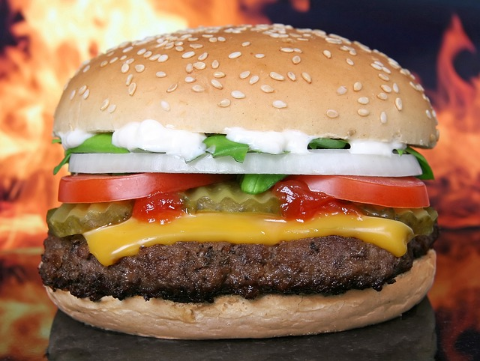

cat.jpg


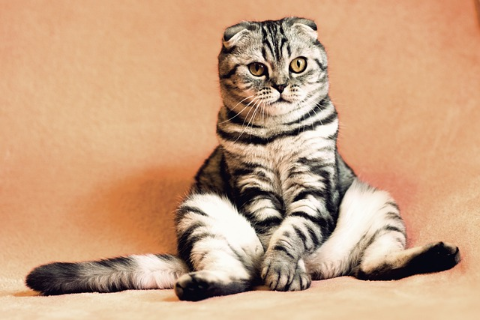

In [14]:
import cv2
from google.colab.patches import cv2_imshow
import math

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)


# Preview the images.

images = {name: cv2.imread(name) for name in IMAGE_FILENAMES}
for name, image in images.items():
  print(name)
  resize_and_show(image)

## Running inference and visualizing the results

Here are the steps to run image classification using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/image_classifier/python) to learn more about configuration options that this solution supports.

In [21]:
!python -m pip install mediapipe

In [26]:
# STEP 1: Import the necessary modules.
!pip install -q mediapipe
import mediapipe
import math
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python.components import processors
from mediapipe.tasks.python import vision

# STEP 2: Create an ImageClassifier object.
base_options = python.BaseOptions(model_asset_path='classifier.tflite')
options = vision.ImageClassifierOptions(
    base_options=base_options, max_results=4)
classifier = vision.ImageClassifier.create_from_options(options)

images = []
predictions = []
for image_name in IMAGE_FILENAMES:
  # STEP 3: Load the input image.
  image = mp.Image.create_from_file(image_name)

  # STEP 4: Classify the input image.
  classification_result = classifier.classify(image)

  # STEP 5: Process the classification result. In this case, visualize it.
  images.append(image)
  top_category = classification_result.classifications[0].categories[0]
  predictions.append(f"{top_category.category_name} ({top_category.score:.2f})")

display_batch_of_images(images, predictions)

NameError: name 'audio_classifier' is not defined